In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
from pathlib import Path

dd = Path('/workspaces/marketing-data/data')


In [10]:
schools = gpd.read_file(dd / 'SCHOOL.zip')
schools.head()

,district,schoolID,priv,shrtName,gsOffered,socType,charter,openDate,zip,city,addr,name,cdsCode,docType,geometry
0,Sweetwater Union High,1,N,Bonita Vista Mid,7-8,Intermediate/Middle Schools (Public),N,1980-07-01,91910,Chula Vista,650 Otay Lakes Road,Bonita Vista Middle,37684116059745,High School District,POINT (6328948.010 1816631.100)
1,Sweetwater Union High,2,N,Bonita Vista SH,9-12,High Schools (Public),N,1980-07-01,91913,Chula Vista,751 Otay Lakes Road,Bonita Vista Senior High,37684113730405,High School District,POINT (6331354.100 1815648.060)
2,Chula Vista Elementary,3,N,Clear View,K-6,Elementary Schools (Public),N,1991-09-10,91910,Chula Vista,455 Windrose Way,Clear View,37680236109771,Elementary School District,POINT (6317094.090 1815461.560)
3,Chula Vista Elementary,4,N,Tiffany,K-6,Elementary Schools (Public),N,1980-07-01,91913,Chula Vista,1691 Elmhurst Street,Tiffany (Burton C.) Elementary,37680236095020,Elementary School District,POINT (6333672.320 1815473.900)
4,Chula Vista Elementary,5,N,McMillin,K-6,Elementary Schools (Public),N,2001-07-17,91913,Chula Vista,1201 Santa Cora Avenue,McMillin (Corky) Elementary,37680236118988,Elementary School District,POINT (6335643.680 1810957.240)


<Axes: >

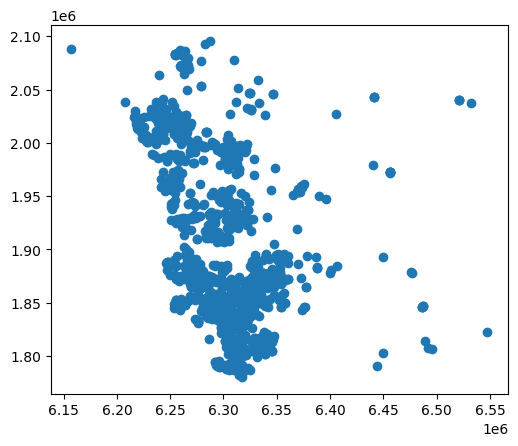

In [4]:
schools.plot()

In [5]:
schools.gsOffered.unique()

array(['7-8', '9-12', 'K-6', 'K-5', 'K-8', 'P-8', 'K-12', '7-12', '6-12',
       'P-6', '6-8', '1-5', 'K-4', '11-12', 'K-3', '3-5', '5-6', '7-9',
       '4-6', 'P-5', 'K-2', '10-12', 'P-12', 'P-K', 'K-1', '3-6', 'P',
       '4-8', '1-12', '5-8', 'Adult', '1-9', '1-6', 'K', '12', 'K-11',
       None, '9-Adult', '3-12', '9', '12-Adult', 'K-9', '8-12', '1-8',
       '3-9', 'K-K'], dtype=object)

In [6]:
#schools.gsOffered.unique() # How to get all of the grades

# Grade we are interested in. 
grades = ['7-8', '9-12', 'K-6', 'K-5', 'K-8', 'P-8', 'K-12', '7-12', '6-12',
       'P-6', '6-8', '11-12',  '5-6', '7-9', '4-6', '10-12', 
       '4-8', '1-12', '5-8',  '1-9',  '12', 'K-11', 
       '3-12', '9', '12-Adult', 'K-9', '8-12', '1-8']

#schools.socType.unique()
types = ['Intermediate/Middle Schools (Public)', 'High Schools (Public)',
       'Elementary Schools (Public)', 'Alternative Schools of Choice',
       'District Community Day Schools',
       'K-12 Schools (Public)',
       'Junior High Schools (Public)',
       'Private',
       'San Marcos Unified']

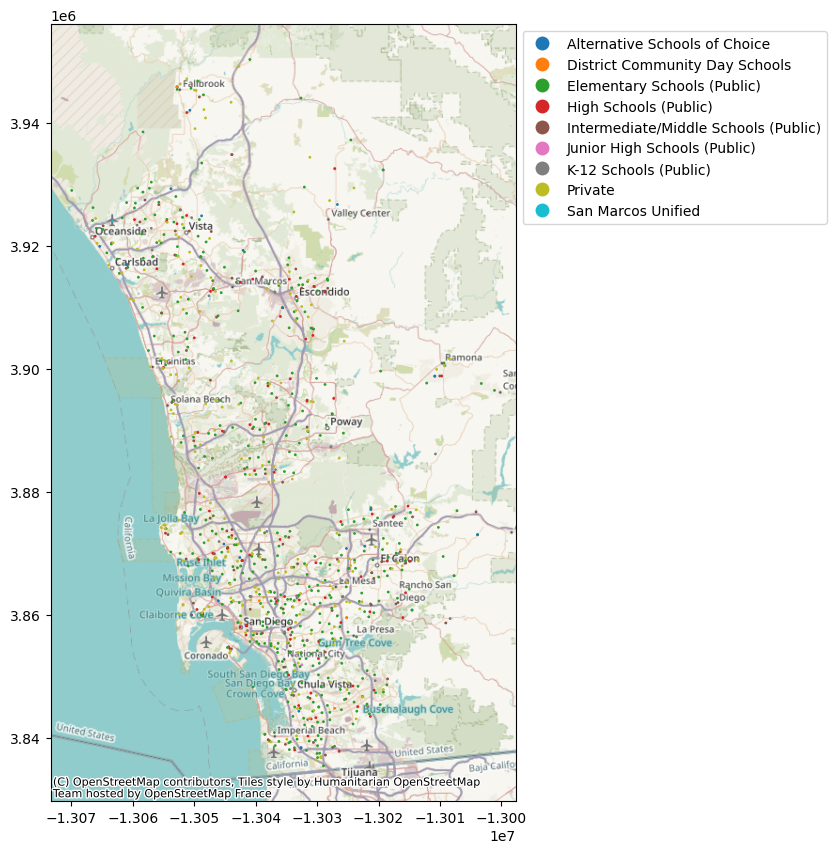

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6,15))  

t = schools.to_crs(epsg=3857) # Make it web mercator to match the basemap
t = t[t.gsOffered.isin(grades)]
t = t[t.socType.isin(types)]
t = t.cx[-1.307e7:-1.300e7, :]

t.plot(markersize=1, column='socType', legend=True, ax=ax)

cx.add_basemap(ax)
leg = ax.get_legend()                                                                         
leg.set_bbox_to_anchor((1, 1))                                                              
    
t.to_file(dd / "schools.geojson", driver='GeoJSON')

In [9]:
libr = gpd.read_file(dd / 'Library.zip')
libr.head()

,WEBSITE,ADDRESS,DISTRICT,NAME,TYPE,PHONE,ZIP,CITY,DATA_SRC,UPDATE_DAT,geometry
0,https://www.chulavistaca.gov/departments/library,365 F Street,Chula Vista,Civic Center Branch,Public,(619) 691-5069,91910,"Chula Vista, CA",Chula Vista,2023-07-25,POINT (6305123.540 1813996.900)
1,https://www.chulavistaca.gov/departments/library,389 Orange Avenue,Chula Vista,South Chula Vista Branch,Public,(619) 585-5755,91911,"Chula Vista, CA",Chula Vista,2023-07-25,POINT (6309570.940 1799657.160)
2,https://coronadolibrary.org/,640 Orange Avenue,Coronado,Coronado Public,Public,(619) 522-7390,92118,"Coronado, CA",City of Coronado website,2023-07-25,POINT (6276278.130 1832521.590)
3,https://www.escondido.org/library,239 South Kalmia Street,Escondido,Escondido Public,Public,(760) 839-4683,92025,"Escondido, CA",City of Escondido,2020-03-05,POINT (6307722.260 1988665.480)
4,https://www.nationalcityca.gov/government/library,1243 National City Blvd,National City,National City Public,Public,(619) 336-4241,91950,"National City, CA",National City Website,2023-07-25,POINT (6298815.066 1824885.622)


<Axes: >

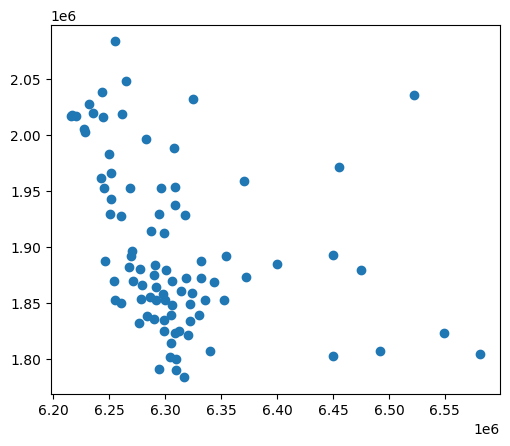

In [11]:
libr.plot()